# Pandas - spojování tabulek a vztahy mezi proměnnými

Tato lekce se nese ve znamení mnohosti a propojování - naučíš se:

- pracovat s více tabulkami najednou
- nacházet spojitosti mezi dvěma (a více) proměnnými

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Spojování tabulek

V lekci, kde jsme zpracovávali data o počasí, jsme ti ukázali, že je pomocí funkce `concat` možné slepit dohromady několik objektů `DataFrame` či `Series`, pokud mají "kompatibilní" index. Nyní se na problematiku podíváme trochu blíže a ukážeme si, jak spojovat tabulky na základě různých sloupců, a co dělat, když řádky z tabulky jedné nepasují přesně na tabulku druhou.

Obecně pro spojování `pandas` nabízí čtyři funkce / metody:

- Funkce `concat`
- Metoda `append`
- Funkce `merge`
- Metoda `join`

Detailní rozbor toho, co která umí, najdeš v [dokumentaci](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

### Řazení pod sebe

In [2]:
a = pd.Series([1, 2, 3])
b = pd.Series([4, 5, 6])

In [3]:
a.append(b)

0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

In [4]:
pd.concat([a, b])

0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

In [5]:
pd.concat(1000 * [a]).reset_index()

,index,0
0,0,1
1,1,2
2,2,3
3,0,1
4,1,2
...,...,...
2995,1,2
2996,2,3
2997,0,1
2998,1,2


In [6]:
pd.concat([a, b], axis=1)

,0,1
0,1,4
1,2,5
2,3,6


In [7]:
pd.DataFrame([[0, 1], [1, 0]])

,0,1
0,0,1
1,1,0


In [8]:
sachy = pd.concat([pd.concat(   
    4 * [pd.DataFrame([[0, 1], [1, 0]])],
    axis=1
)] * 4)
sachy.index = list(range(1, 9))
sachy.columns = list("ABCDEFGH")
sachy

,A,B,C,D,E,F,G,H
1,0,1,0,1,0,1,0,1
2,1,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0,1
4,1,0,1,0,1,0,1,0
5,0,1,0,1,0,1,0,1
6,1,0,1,0,1,0,1,0
7,0,1,0,1,0,1,0,1
8,1,0,1,0,1,0,1,0


### Stažení dat

Data pro dnešní hodinu (ze světa filmu) jsou veliká. Úmyslně veliká. Jsou tak veliká, že ti je nemůžeme naservírovat na stříbrném podnose (leda bys sebou takový podnos měl/a a na něm ležela flashka, na kterou ti je můžeme nahrát). Nabízí se dvě možnosti, jak je můžeš získat:

**Alternativa 1.** Stáhni si manuálně do aktuálního adresáře následující soubory:

- https://datasets.imdbws.com/title.basics.tsv.gz
- https://datasets.imdbws.com/title.ratings.tsv.gz
- https://github.com/coobas/pycon-cz-2019-workshop/raw/master/data/rotten_tomatoes_top_movies_2019-01-15.csv
- https://github.com/coobas/pycon-cz-2019-workshop/raw/master/data/boxoffice_march_2019.csv.gz

**Alternativa 2:** Pusť si (ideálně ještě doma, před hodinou) následující kód, který stáhne všechny potřebné soubory. Navíc to učiní pouze jednou, opětovné volání už nic dalšího nestahuje.

<div style="color: red; background: yellow">Vyřešit, odkud budeme data brát, jsou to stovky MB a navíc není jasné, jak moc legální je mít je lokálně uložená.</div>

In [9]:
# Nutné importy ze standardní knihovny
import os
from urllib.request import urlopen

# Seznam souborů (viz níže)
zdroje = [
    "https://datasets.imdbws.com/title.basics.tsv.gz",
    "https://datasets.imdbws.com/title.ratings.tsv.gz",
    "https://github.com/coobas/pycon-cz-2019-workshop/raw/master/data/rotten_tomatoes_top_movies_2019-01-15.csv",
    "https://github.com/coobas/pycon-cz-2019-workshop/raw/master/data/boxoffice_march_2019.csv.gz"
]

for url in zdroje:
    # Pouze poslední část cesty adresy datového zdroje je jeho jméno
    jmeno = url.rsplit("/")[-1]
    
    if not os.path.exists(jmeno):        
        print(f"Soubor {jmeno} ještě není stažen, jdeme na to...")
        
        # Sendvičově otevřeme výstup (soubor na disku) i vstup (webovou stránku)
        with open(jmeno, "wb") as outfile:  # Pozor - binární mód
            with urlopen(url) as inpage:
                # A jen přepíšeme obsah 
                outfile.write(inpage.read())
        print(f"Soubor {jmeno} úspěšně stažen.")
    else:
        print(f"Soubor {jmeno} už byl stažen, použijeme místní kopii.")

Soubor title.basics.tsv.gz už byl stažen, použijeme místní kopii.
Soubor title.ratings.tsv.gz už byl stažen, použijeme místní kopii.
Soubor rotten_tomatoes_top_movies_2019-01-15.csv už byl stažen, použijeme místní kopii.
Soubor boxoffice_march_2019.csv.gz už byl stažen, použijeme místní kopii.


Máme staženo několik souborů

In [10]:
imdb_titles_raw = pd.read_csv('title.basics.tsv.gz', sep='\t', na_values="\\N")
imdb_ratings_raw = pd.read_csv('title.ratings.tsv.gz', sep='\t', na_values="\\N")
boxoffice_raw = pd.read_csv('boxoffice_march_2019.csv.gz')
rotten_tomatoes_raw = pd.read_csv("rotten_tomatoes_top_movies_2019-01-15.csv")

C:\Users\janpi\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
imdb_titles_raw

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
6419875,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010.0,NaN,NaN,"Action,Drama,Family"
6419876,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010.0,NaN,NaN,"Action,Drama,Family"
6419877,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010.0,NaN,NaN,"Action,Drama,Family"
6419878,tt9916856,short,The Wind,The Wind,0,2015.0,NaN,27,Short


In [12]:
imdb_titles_raw.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear           float64
runtimeMinutes     object
genres             object
dtype: object

In [13]:
# Nejenom filmy, ale i mraky epizod a drobných děl
imdb_titles_raw["titleType"].value_counts()

tvEpisode       4523550
short            717153
movie            539533
video            250472
tvSeries         176464
tvMovie          120603
tvMiniSeries      28820
tvSpecial         26739
videoGame         24784
tvShort           11762
Name: titleType, dtype: int64

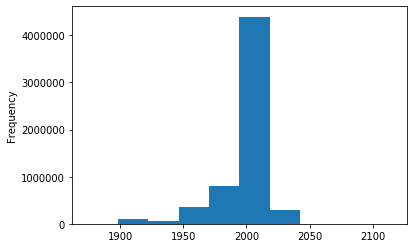

In [14]:
# Filmy z budoucnosti!
imdb_titles_raw["startYear"].plot.hist()

In [15]:
# Očividně někdo zapisoval hodnoty, kam neměl
imdb_titles_raw["isAdult"].value_counts()

0       6226822
1        193047
2019          4
2020          1
2018          1
2015          1
2014          1
2005          1
2004          1
1994          1
Name: isAdult, dtype: int64

In [16]:
movies = (imdb_titles_raw
    .query("titleType == 'movie'")
    .query("startYear <= 2019")             # Vyhodí budoucnost i nevyplněné
    .query("isAdult <= 1")                  # Chybně vyplněné řádky
    .assign(
        titleType=lambda df: df["titleType"].astype("category"),
        startYear=lambda df: df["startYear"].astype(int),
        isAdult=lambda df: df["isAdult"].astype(bool),
        runtimeMinutes=lambda df: pd.to_numeric(df["runtimeMinutes"], errors="coerce").astype("Int32")
    )
    .drop(["titleType", "endYear"], axis="columns")
    .dropna(subset=["runtimeMinutes"])
    .rename({
        "primaryTitle": "title",
        "runtimeMinutes": "length",
        "originalTitle": "original_title",
        "startYear": "year",
        "isAdult": "is_adult",
    }, axis="columns")
    .set_index("tconst")
    .sort_values(["year", "title"])
)

In [17]:
movies

,title,original_title,is_adult,year,length,genres
tconst,,,,,,
tt0000009,Miss Jerry,Miss Jerry,False,1894,45,Romance
tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,20,"Documentary,News,Sport"
tt0221032,Branding Cattle,Branding Cattle,False,1898,1,"Documentary,Sci-Fi"
tt0230366,Jeffries-Sharkey Contest,Jeffries-Sharkey Contest,False,1899,135,"Documentary,News,Sport"
tt0291338,May Day Parade,May Day Parade,False,1900,66,News
...,...,...,...,...,...,...
tt10150420,Øyeblikk,Øyeblikk,False,2019,97,Documentary
tt10579880,Über Grenzen - der Film einer langen Reise,Über Grenzen - der Film einer langen Reise,False,2019,105,Documentary
tt9472318,Üres lovak,Üres lovak,False,2019,67,Biography


In [18]:
print(movies.shape)
print(movies.dtypes)

(335162, 6)
title             object
original_title    object
is_adult            bool
year               int32
length             Int32
genres            object
dtype: object


In [19]:
imdb_ratings_raw

,tconst,averageRating,numVotes
0,tt0000001,5.6,1561
1,tt0000002,6.1,188
2,tt0000003,6.5,1225
3,tt0000004,6.1,114
4,tt0000005,6.1,1958
...,...,...,...
1006167,tt9916576,5.9,7
1006168,tt9916578,9.2,12
1006169,tt9916720,5.3,44
1006170,tt9916766,6.7,11


In [20]:
imdb_ratings_raw.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [21]:
ratings = (imdb_ratings_raw
    .rename({
        "averageRating": "imdb_rating",
        "numVotes": "imdb_votes"
    }, axis="columns")
    .set_index("tconst")
)

In [22]:
movies.join(ratings)

,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes
tconst,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,False,1894,45,Romance,5.4,84.0
tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,20,"Documentary,News,Sport",5.2,316.0
tt0221032,Branding Cattle,Branding Cattle,False,1898,1,"Documentary,Sci-Fi",4.7,16.0
tt0230366,Jeffries-Sharkey Contest,Jeffries-Sharkey Contest,False,1899,135,"Documentary,News,Sport",3.9,35.0
tt0291338,May Day Parade,May Day Parade,False,1900,66,News,7.1,7.0
...,...,...,...,...,...,...,...,...
tt10150420,Øyeblikk,Øyeblikk,False,2019,97,Documentary,NaN,NaN
tt10579880,Über Grenzen - der Film einer langen Reise,Über Grenzen - der Film einer langen Reise,False,2019,105,Documentary,NaN,NaN
tt9472318,Üres lovak,Üres lovak,False,2019,67,Biography,7.4,23.0


In [23]:
movies.join(ratings, how="inner")

,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes
tconst,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,False,1894,45,Romance,5.4,84
tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,20,"Documentary,News,Sport",5.2,316
tt0221032,Branding Cattle,Branding Cattle,False,1898,1,"Documentary,Sci-Fi",4.7,16
tt0230366,Jeffries-Sharkey Contest,Jeffries-Sharkey Contest,False,1899,135,"Documentary,News,Sport",3.9,35
tt0291338,May Day Parade,May Day Parade,False,1900,66,News,7.1,7
...,...,...,...,...,...,...,...,...
tt9581172,Öndög,Öndög,False,2019,100,Drama,6.9,242
tt9308170,Özgür Dünya,Özgür Dünya,False,2019,122,"Action,Adventure,Family",2.3,230
tt9472318,Üres lovak,Üres lovak,False,2019,67,Biography,7.4,23


Zkusme si zreprodukovat pořadí 250 nejlepších filmů z IMDB (viz https://www.imdb.com/chart/top/?ref_=nv_mv_250):

In [24]:
movies_with_rating = movies.join(ratings, how="inner")
(movies_with_rating
    .query("imdb_votes > 25000")
    .sort_values("imdb_rating", ascending=False)
    .reset_index(drop=True)
).head(30)

,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes
0,The Chaos Class,Hababam Sinifi,False,1975,87,"Comedy,Drama",9.4,34670
1,The Shawshank Redemption,The Shawshank Redemption,False,1994,142,Drama,9.3,2172577
2,The Godfather,The Godfather,False,1972,175,"Crime,Drama",9.2,1496722
3,CM101MMXI Fundamentals,CM101MMXI Fundamentals,False,2013,139,"Comedy,Documentary",9.2,42245
4,The Dark Knight,The Dark Knight,False,2008,152,"Action,Crime,Drama",9.0,2156729
5,The Godfather: Part II,The Godfather: Part II,False,1974,202,"Crime,Drama",9.0,1047873
6,The Mountain II,Dag II,False,2016,135,"Action,Drama,War",9.0,102065
7,12 Angry Men,12 Angry Men,False,1957,96,Drama,8.9,632351
8,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,False,2003,201,"Adventure,Drama,Fantasy",8.9,1545865
9,Schindler's List,Schindler's List,False,1993,195,"Biography,Drama,History",8.9,1134131


In [25]:
boxoffice_raw

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678815482,2018
4,5,Titanic,Par.,659363944,1997
...,...,...,...,...,...
16262,16263,Dog Eat Dog,IFC,80,2009
16263,16264,Paranoid Girls,NaN,78,2015
16264,16265,Confession of a Child of the Century,Cohen,74,2015
16265,16266,Storage 24,Magn.,72,2013


In [27]:
boxoffice_raw.dtypes

rank               int64
title             object
studio            object
lifetime_gross     int64
year               int64
dtype: object

In [28]:
boxoffice = (boxoffice_raw
    .rename({
        "rank": "boxoffice_rank"
    }, axis="columns")
)

In [29]:
movies_with_rating_and_boxoffice_beta = pd.merge(
    movies_with_rating,
    boxoffice,
    on=["title"]
)
movies_with_rating_and_boxoffice_beta.query("title == 'Pinocchio'")

,title,original_title,is_adult,year_x,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross,year_y
0,Pinocchio,Pinocchio,False,1911,50,Fantasy,5.8,75,885,Dis.,84254167,1940
1,Pinocchio,Pinocchio,False,1911,50,Fantasy,5.8,75,6108,Mira.,3684305,2002
2,Pinocchio,Pinocchio,False,1940,88,"Animation,Comedy,Family",7.4,121153,885,Dis.,84254167,1940
3,Pinocchio,Pinocchio,False,1940,88,"Animation,Comedy,Family",7.4,121153,6108,Mira.,3684305,2002
4,Pinocchio,Turlis Abenteuer,False,1967,75,"Adventure,Family,Fantasy",7.3,21,885,Dis.,84254167,1940
5,Pinocchio,Turlis Abenteuer,False,1967,75,"Adventure,Family,Fantasy",7.3,21,6108,Mira.,3684305,2002
6,Pinocchio,Pinocchio,False,1971,74,"Comedy,Fantasy",3.6,130,885,Dis.,84254167,1940
7,Pinocchio,Pinocchio,False,1971,74,"Comedy,Fantasy",3.6,130,6108,Mira.,3684305,2002
8,Pinocchio,Un burattino di nome Pinocchio,False,1971,96,"Animation,Family,Fantasy",6.8,125,885,Dis.,84254167,1940
9,Pinocchio,Un burattino di nome Pinocchio,False,1971,96,"Animation,Family,Fantasy",6.8,125,6108,Mira.,3684305,2002


In [30]:
movies_with_rating_and_boxoffice = (
    pd.merge(
        movies_with_rating,
        boxoffice,
        # left_on=["primaryTitle", "startYear"],
        on=["title", "year"]
    )
)
movies_with_rating_and_boxoffice.query("title == 'Pinocchio'")

,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross
9,Pinocchio,Pinocchio,False,1940,88,"Animation,Comedy,Family",7.4,121153,885,Dis.,84254167
4134,Pinocchio,Pinocchio,False,2002,108,"Comedy,Family,Fantasy",4.3,7356,6108,Mira.,3684305


In [31]:
movies_with_rating_and_boxoffice.sort_values("lifetime_gross", ascending=False).head(10)

,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross
5903,Avatar,Avatar,False,2009,162,"Action,Adventure,Fantasy",7.8,1071483,2,Fox,760507625
8723,Black Panther,Black Panther,False,2018,134,"Action,Adventure,Sci-Fi",7.3,557072,3,BV,700059566
8702,Avengers: Infinity War,Avengers: Infinity War,False,2018,149,"Action,Adventure,Sci-Fi",8.5,734676,4,BV,678815482
3135,Titanic,Titanic,False,1997,194,"Drama,Romance",7.8,985670,5,Par.,659363944
7748,Jurassic World,Jurassic World,False,2015,124,"Action,Adventure,Sci-Fi",7.0,552577,6,Uni.,652270625
8814,Incredibles 2,Incredibles 2,False,2018,118,"Action,Adventure,Animation",7.7,221921,9,BV,608581744
5813,The Dark Knight,The Dark Knight,False,2008,152,"Action,Crime,Drama",9.0,2156729,10,WB,535234033
8176,Rogue One: A Star Wars Story,Rogue One,False,2016,133,"Action,Adventure,Sci-Fi",7.8,506672,11,BV,532177324
8030,Finding Dory,Finding Dory,False,2016,97,"Adventure,Animation,Comedy",7.3,222125,13,BV,486295561
3492,Star Wars: Episode I - The Phantom Menace,Star Wars: Episode I - The Phantom Menace,False,1999,136,"Action,Adventure,Fantasy",6.5,680555,14,Fox,474544677


In [32]:
movies_with_rating[movies_with_rating["title"].str.startswith("Star Wars:")].sort_values("year", ascending=False)

,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes
tconst,,,,,,,,
tt2527338,Star Wars: Episode IX - The Rise of Skywalker,Star Wars: Episode IX - The Rise of Skywalker,False,2019,142,"Action,Adventure,Fantasy",7.0,159507
tt9548962,Star Wars: The Fans Vs Disney,Star Wars: The Fans Vs Disney,False,2018,57,Documentary,9.0,46
tt2527336,Star Wars: Episode VIII - The Last Jedi,Star Wars: Episode VIII - The Last Jedi,False,2017,151,"Action,Adventure,Fantasy",7.1,504356
tt7421764,Star Wars: Rise of the First Order,Star Wars: Rise of the First Order,False,2017,87,"Action,Drama",5.5,8
tt5957180,Star Wars: The Dark Reckoning,Star Wars: The Dark Reckoning,False,2017,45,Sci-Fi,5.8,12
tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,False,2015,138,"Action,Adventure,Sci-Fi",7.9,813070
tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,False,2014,110,"Action,Adventure,Sci-Fi",4.0,490
tt1432993,Star Wars: A Galaxy in Darkness,Star Wars: A Galaxy in Darkness,False,2009,46,"Adventure,Animation,Drama",5.2,22
tt1185834,Star Wars: The Clone Wars,Star Wars: The Clone Wars,False,2008,98,"Action,Adventure,Animation",5.9,52157


In [33]:
rotten_tomatoes_raw

,Rank,Title,RatingTomatometer,No. of Reviews,Genres
0,1,Black Panther (2018),97,444,action|adventure
1,2,Mad Max: Fury Road (2015),97,394,action|adventure
2,3,Wonder Woman (2017),93,410,action|adventure
3,4,Metropolis (1927),99,118,action|adventure
4,5,Coco (2017),97,308,action|adventure
...,...,...,...,...,...
1585,70,Priest (2011),15,97,western
1586,71,American Outlaws (2001),14,103,western
1587,72,September Dawn (2007),15,54,western
1588,73,Jonah Hex (2010),12,147,western


In [34]:
rotten_tomatoes_raw["Title"].value_counts()

Yellow Submarine (1968)                          6
Afghan Star (2009)                               5
Beauty and the Beast (1991)                      5
Miracle on 34th Street (1947)                    5
Mary Poppins (1964)                              5
                                                ..
13th (2016)                                      1
Boy and the World (O Menino e o Mundo) (2015)    1
Lagaan: Once Upon a Time in India (2001)         1
Poltergeist (1982)                               1
Save the Green Planet (2004)                     1
Name: Title, Length: 947, dtype: int64

In [35]:
rotten_tomatoes_raw.drop_duplicates(subset=["Title"])

,Rank,Title,RatingTomatometer,No. of Reviews,Genres
0,1,Black Panther (2018),97,444,action|adventure
1,2,Mad Max: Fury Road (2015),97,394,action|adventure
2,3,Wonder Woman (2017),93,410,action|adventure
3,4,Metropolis (1927),99,118,action|adventure
4,5,Coco (2017),97,308,action|adventure
...,...,...,...,...,...
1585,70,Priest (2011),15,97,western
1586,71,American Outlaws (2001),14,103,western
1587,72,September Dawn (2007),15,54,western
1588,73,Jonah Hex (2010),12,147,western


In [36]:
rotten_tomatoes_beta = (rotten_tomatoes_raw
    .drop_duplicates(subset=["Title"])
    .assign(
        title=lambda df: df["Title"].str.slice(0, -7),
        year=lambda df: df["Title"].str.slice(-5, -1).astype(int)
    )
    .drop_duplicates(subset=["Title"])
    .rename({
        "RatingTomatometer": "tomatoes_rating",
        "No. of Reviews": "tomatoes_votes",
    }, axis="columns")
    .drop(["Title", "Rank", "Genres"], axis="columns")
)
rotten_tomatoes_beta

,tomatoes_rating,tomatoes_votes,title,year
0,97,444,Black Panther,2018
1,97,394,Mad Max: Fury Road,2015
2,93,410,Wonder Woman,2017
3,99,118,Metropolis,1927
4,97,308,Coco,2017
...,...,...,...,...
1585,15,97,Priest,2011
1586,14,103,American Outlaws,2001
1587,15,54,September Dawn,2007
1588,12,147,Jonah Hex,2010


In [37]:
rotten_tomatoes = (rotten_tomatoes_beta
    .assign(
        title=rotten_tomatoes_beta["title"].str.rsplit("(", 1).apply(lambda x: x[0])
    )
)
rotten_tomatoes

,tomatoes_rating,tomatoes_votes,title,year
0,97,444,Black Panther,2018
1,97,394,Mad Max: Fury Road,2015
2,93,410,Wonder Woman,2017
3,99,118,Metropolis,1927
4,97,308,Coco,2017
...,...,...,...,...
1585,15,97,Priest,2011
1586,14,103,American Outlaws,2001
1587,15,54,September Dawn,2007
1588,12,147,Jonah Hex,2010


In [38]:
rotten_tomatoes.title.value_counts()

Halloween                         2
Hairspray                         2
The Magnificent Seven             2
True Grit                         2
Invasion of the Body Snatchers    2
                                 ..
Gravity                           1
The Warrior's Way                 1
Open City                         1
Kung Fu Panda 3                   1
Control Room                      1
Name: title, Length: 942, dtype: int64

In [39]:
movies_complete = pd.merge(
    movies_with_rating_and_boxoffice,
    rotten_tomatoes,
    on=["title", "year"],
    how="inner"
)
movies_complete.sort_values("boxoffice_rank").reset_index(drop=True).head(20)

,title,original_title,is_adult,year,length,genres,imdb_rating,imdb_votes,boxoffice_rank,studio,lifetime_gross,tomatoes_rating,tomatoes_votes
0,Black Panther,Black Panther,False,2018,134,"Action,Adventure,Sci-Fi",7.3,557072,3,BV,700059566,97,444
1,Avengers: Infinity War,Avengers: Infinity War,False,2018,149,"Action,Adventure,Sci-Fi",8.5,734676,4,BV,678815482,84,408
2,Titanic,Titanic,False,1997,194,"Drama,Romance",7.8,985670,5,Par.,659363944,89,184
3,Incredibles 2,Incredibles 2,False,2018,118,"Action,Adventure,Animation",7.7,221921,9,BV,608581744,94,332
4,The Dark Knight,The Dark Knight,False,2008,152,"Action,Crime,Drama",9.0,2156729,10,WB,535234033,94,332
5,Finding Dory,Finding Dory,False,2016,97,"Adventure,Animation,Comedy",7.3,222125,13,BV,486295561,94,309
6,Shrek 2,Shrek 2,False,2004,93,"Adventure,Animation,Comedy",7.2,394696,18,DW,441226247,89,235
7,The Lion King,The Lion King,False,1994,88,"Adventure,Animation,Drama",8.5,877753,22,BV,422783777,93,123
8,Toy Story 3,Toy Story 3,False,2010,103,"Adventure,Animation,Comedy",8.3,711637,24,BV,415004880,98,299
9,Wonder Woman,Wonder Woman,False,2017,141,"Action,Adventure,Fantasy",7.4,511092,25,WB,412563408,93,410


**Smutná poznámka** Tohle obecně nemá řešení.

## Vztahy mezi dvěma proměnnými

Když jsme studovali vlastnosti zemí světa, věnovali jsme se především jednotlivým charakteristikám zvlášť, nanejvýš pak jsme si udělali intuitivní obrázek z bodového grafu ("scatter plot"), kde osy *x* a *y* patřily dvěma různým vlastnostem. Nyní se vztahy mezi více proměnnými budeme zabývat rigorózně a ukážeme si i některé odvážnější vizualizace.

In [40]:
import plotly.express as px
iris = px.data.iris()

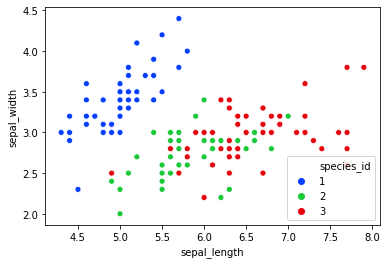

In [41]:
sns.scatterplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    palette=sns.palettes.color_palette("bright6", 3),
    hue="species_id"
)

### Korelace

- všeobecný význam
- statistický význam

In [42]:
iris["sepal_width"].corr(iris["sepal_length"])

-0.10936924995064937

In [43]:
iris.drop("species_id", axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [44]:
iris.groupby("species_id").corr()

sepal_length  sepal_width  petal_length  petal_width
species_id                                                                   
1          sepal_length      1.000000     0.746780      0.263874     0.279092
           sepal_width       0.746780     1.000000      0.176695     0.279973
           petal_length      0.263874     0.176695      1.000000     0.306308
           petal_width       0.279092     0.279973      0.306308     1.000000
2          sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
3          sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

Záludnost souhrnných statistik názorně ukazuje tzv. **[Anscombeho kvartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)**, čtveřice naprosto odlišných datových sad, které všechny sdílejí stejné hodnoty základních statistik (s jistou přesností):

In [45]:
anscombe = pd.read_csv("static/anscombe.csv")
anscombe[:15]

,x,y,data
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0
5,14,9.96,0
6,6,7.24,0
7,4,4.26,0
8,12,10.84,0
9,7,4.82,0


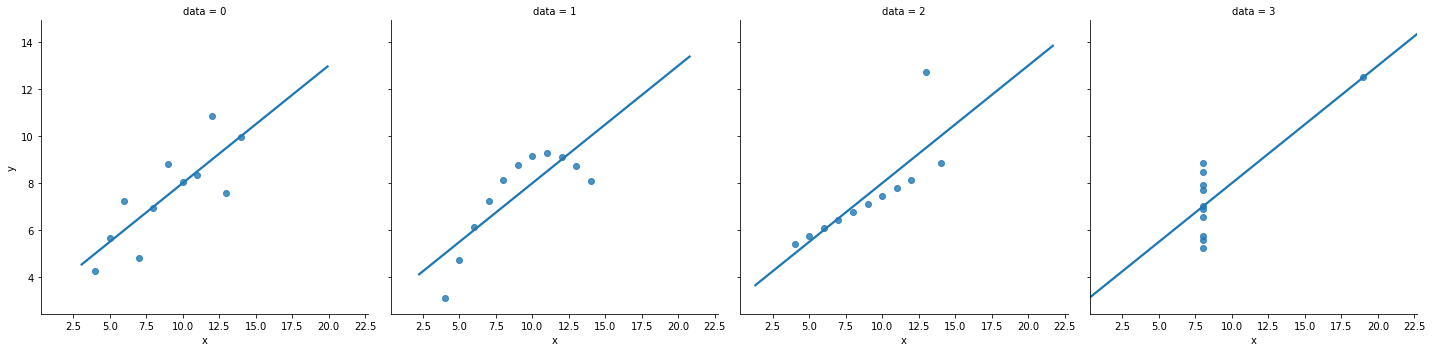

In [46]:
#grid = sns.FacetGrid(
#    anscombe,
#    col="data",
#    col_wrap=2,
#)
sns.lmplot(data=anscombe, col="data", x="x", y="y", ci=None)

In [47]:
anscombe[anscombe["data"] == 1].describe()

,x,y,data
count,11.000000,11.000000,11.0
mean,9.000000,7.500909,1.0
std,3.316625,2.031657,0.0
min,4.000000,3.100000,1.0
25%,6.500000,6.695000,1.0
50%,9.000000,8.140000,1.0
75%,11.500000,8.950000,1.0
max,14.000000,9.260000,1.0


In [48]:
anscombe[anscombe["data"] == 0].describe()

,x,y,data
count,11.000000,11.000000,11.0
mean,9.000000,7.500909,0.0
std,3.316625,2.031568,0.0
min,4.000000,4.260000,0.0
25%,6.500000,6.315000,0.0
50%,9.000000,7.580000,0.0
75%,11.500000,8.570000,0.0
max,14.000000,10.840000,0.0


In [49]:
anscombe[anscombe["data"] == 0][["x", "y"]].corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [50]:
anscombe[anscombe["data"] == 1][["x", "y"]].corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


Dovedeno do extrému, není vůbec problém nakreslit téměř libovolně vypadající obrázek alias bodový graf, který bude mít dané souhrnné statistiky. V pěkném interaktivním článku [Same Stats, Different Graphs...](https://www.autodeskresearch.com/publications/samestats) autoři ukazují pěkné animace plynulých přechodů mezi sadami, které se chovají podobně jako Anscombeho kvartet.

My si ukážeme aspoň statickou podobu:

In [51]:
# Data nejsou oddělená čárkami, ale tabulátory
datasaurus = pd.read_csv("static/datasaurus_dozen.tsv", delimiter="\t")
datasaurus.sample(10)

,dataset,x,y
1805,wide_lines,64.203719,26.644114
522,v_lines,89.501624,45.815179
647,x_shape,76.105629,95.304981
221,away,43.490450,40.782542
789,star,57.997805,92.159909
238,away,43.542776,62.460311
680,x_shape,39.878305,18.324929
67,dino,53.076900,85.256400
796,star,72.175824,63.128929
1390,bullseye,46.508614,11.207134


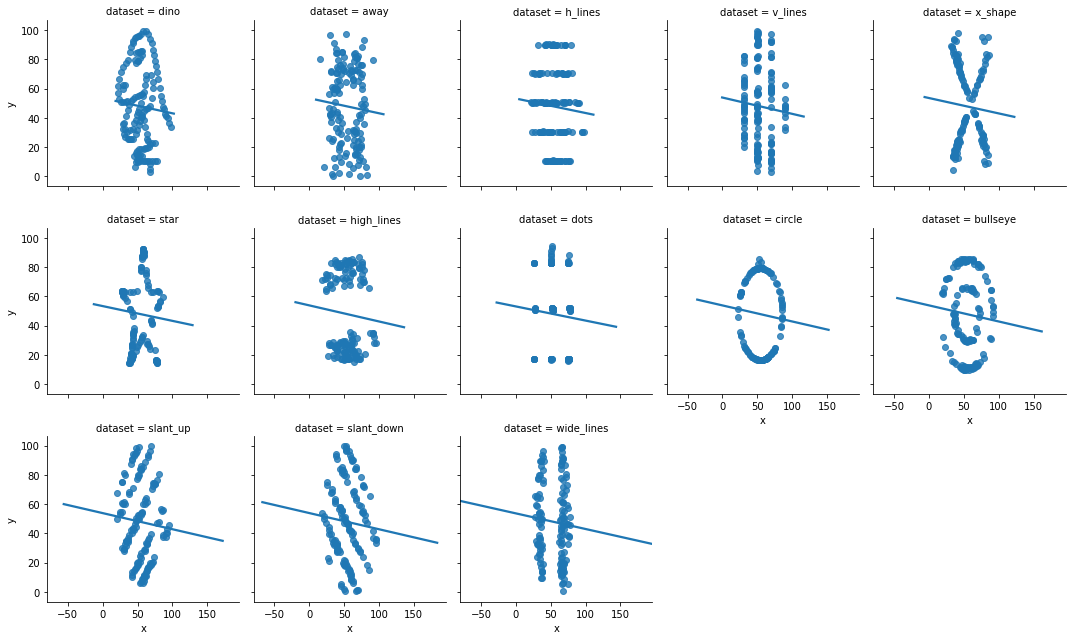

In [52]:
grid = sns.FacetGrid(
    datasaurus,
    col="dataset",
    col_wrap=5,
)
grid.map(sns.regplot, "x", "y", ci=None)

In [53]:
grouper = datasaurus.groupby("dataset")
single = grouper.agg({"x": ("mean", "std"), "y": ("mean", "std")})
correlation = grouper.apply(lambda g: g["x"].corr(g["y"])).rename("pearson_r")
single.join(correlation)

C:\Users\janpi\Miniconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



,"(x, mean)","(x, std)","(y, mean)","(y, std)",pearson_r
dataset,,,,,
away,54.266100,16.769825,47.834721,26.939743,-0.064128
bullseye,54.268730,16.769239,47.830823,26.935727,-0.068586
circle,54.267320,16.760013,47.837717,26.930036,-0.068343
dino,54.263273,16.765142,47.832253,26.935403,-0.064472
dots,54.260303,16.767735,47.839829,26.930192,-0.060341
h_lines,54.261442,16.765898,47.830252,26.939876,-0.061715
high_lines,54.268805,16.766704,47.835450,26.939998,-0.068504
slant_down,54.267849,16.766759,47.835896,26.936105,-0.068980
slant_up,54.265882,16.768853,47.831496,26.938608,-0.068609


Korelační koeficient: -0.06676704508241184


,x,y
count,100.000000,100.000000
mean,54.260000,47.830000
std,16.854484,27.075719
min,20.315432,-9.392220
25%,41.327450,30.752993
50%,53.337045,51.096752
75%,67.105099,64.810025
max,99.421420,112.364265


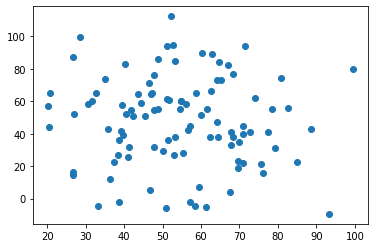

In [54]:
import numpy as np
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

while True:
    correlation = pd.Series(x).corr(pd.Series(y))
    if correlation < -0.067:
        y = y + (x * 0.001)
    elif correlation > -0.065:
        y = y - (x * 0.001)
    else:
        break
        
x = x * 16.77 / x.std()
x = x + 54.26 - x.mean()

y = y * 26.94 / y.std()
y = y + 47.83 - y.mean()

plt.scatter(x, y)
print("Korelační koeficient:", pd.Series(x).corr(pd.Series(y)))
pd.DataFrame({"x": x, "y": y}).describe()

### Heatmap

## Vztahy mezi více proměnnými

Pokud si tyto materiály nečteš na holografickém displeji, jsi při zobrazování dat omezen/a na dva rozměry. Můžeš si prohlížet dvourozměrné tabulky, kreslit dvourozměrné grafy.

In [55]:
# scattermatrix

In [56]:
# pairplot

In [57]:
# catplot

In [58]:
# 3D grafy

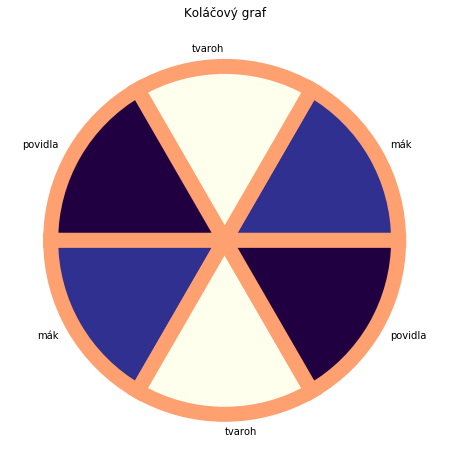

In [59]:
# TODO: Přesunout někam jinam :-)
import pandas as pd
kolac = pd.Series(
    [1, 1, 1] * 2,
    index = ["mák", "tvaroh", "povidla"] * 2
)
ax = kolac.plot.pie(
    figsize=(8, 8),
    title="Koláčový graf",
    colors=["#303090", "#ffffed", "#200040"] * 2,
    wedgeprops = {'linewidth': 15, 'edgecolor': "#ffa070"},
)
ax.set_ylabel(None);